In [1]:
%load_ext rpy2.ipython
import numpy as np
import time
import elpigraph
import matplotlib.pyplot as plt

X =  np.genfromtxt('data/tree_data.csv', delimiter=',')

In [20]:
run_points_colab_hybrid = [[2.235868215560913,
  8.04754900932312,
  14.218730926513672,
  22.43982243537903,
  35.0305061340332,
  51.293405294418335],
 [3.4747135639190674,
  12.28583836555481,
  19.56864619255066,
  31.423277139663696,
  46.67190456390381,
  65.93725347518921],
 [15.423911333084106,
  52.59123969078064,
  89.74802350997925,
  140.48946690559387,
  222.83035445213318,
  331.40812373161316]]

In [25]:
run_points = [[0.4735743999481201,
  1.975245714187622,
  3.82466983795166,
  6.864759206771851,
  10.896778345108032,
  18.30372405052185],
 [2.533820867538452,
  12.195196866989136,
  23.8655104637146,
  47.168001651763916,
  74.06683897972107,
  130.87490344047546],
 [30.06736946105957,
  121.04888701438904,
  258.76202154159546,
  428.54820466041565,
  1017.1754696369171,
  1782.3783693313599]]

[[0.4735743999481201,
  1.975245714187622,
  3.82466983795166,
  6.864759206771851,
  10.896778345108032,
  18.30372405052185],
 [2.533820867538452,
  12.195196866989136,
  23.8655104637146,
  47.168001651763916,
  74.06683897972107,
  130.87490344047546],
 [30.06736946105957,
  121.04888701438904,
  258.76202154159546,
  428.54820466041565,
  1017.1754696369171,
  1782.3783693313599]]

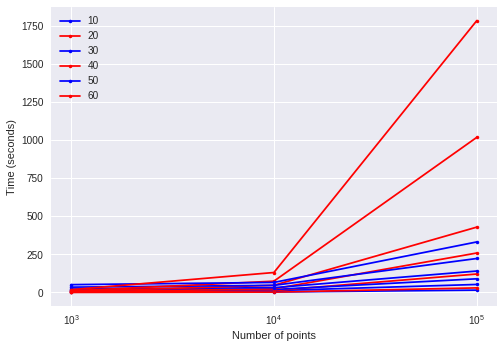

In [24]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
for i in range(len(run_points[0])):
    plt.plot(num_points,[j[i] for j in run_points_colab_hybrid],marker='.',c='b')
    plt.plot(num_points,[j[i] for j in run_points],marker='.',c='r')
    plt.xlabel('Number of points')
    plt.ylabel('Time (seconds)')
    plt.xscale('log')
    plt.legend(num_nodes)
plt.show()

In [19]:
np.random.seed(0)
num_points = [1000,10000,100000]
num_nodes = [10,20,30,40,50,60]

store_X = []
run_points = []
for j in num_points:
    run_nodes = []
    for i in num_nodes:
        X=np.random.random(size=(j,10))
        store_X.append(X)
        s = time.time()
        res = elpigraph.computeElasticPrincipalTree(X = X,NumNodes = i,drawPCAView=False)
        end = time.time() - s
        run_nodes.append(end)
    run_points.append(run_nodes)

Generating the initial configuration
Creating a chain in the 1st PC with 2 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
Performing PCA
Using standard PCA
10 dimensions are being used
100.0 % of the original variance has been retained
The elastic matrix is being used. Edge configuration will be ignored
Computing EPG with  10  nodes on  1000  points and  10  dimensions
Nodes =  2 3 4 5 6 7 8 9 

BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

1||10	0.6063	10	9	0	0	0	0	0.5868	0.5821	0.3003	0.306	0.0194	0.0	0.0004	0.0036	0


MSDEnergyPlot not yet implemented
accuracyComplexityPlot not yet implemented
0.4647  seconds elapsed
Generating the initial configuration
Creating a chain in the 1st PC with 2 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
Performing PCA
Using standard PCA
10 dimensions are being used
100.0

In [10]:
import rpy2.robjects.numpy2ri
import rpy2.robjects.packages as rpackages
rpy2.robjects.numpy2ri.activate()
r_elpigraph = rpackages.importr("ElPiGraph.R")

np.random.seed(0)
num_points = [1000,10000,100000]
num_nodes = [10,20,30,40,50,60]

store_X = []
run_points = []
for j in num_points:
    run_nodes = []
    for i in num_nodes:
        X=np.random.random(size=(j,10))
        store_X.append(X)
        s = time.time()
        res= r_elpigraph.computeElasticPrincipalTree(X,10)
        end = time.time() - s
        run_nodes.append(end)
    run_points.append(run_nodes)
np.random.seed(0)
X=np.random.random(size=(1000,10))
res=r_elpigraph.computeElasticPrincipalTree(X,10)
1||10	0.6063	10	9	0	0	0	0	0.5868	0.5821	0.3003	0.306	0.0194	0.0	0.0004	0.0036	0

[1] "Generating the initial configuration"
[1] "Creating a chain in the 1st PC with 2 nodes"
[1] "Constructing tree 1 of 1 / Subset 1 of 1"
[1] "Performing PCA on the data"
[1] "Using standard PCA"
[1] "10 dimensions are being used"
[1] "100% of the original variance has been retained"
[1] "The elastic matrix is being used. Edge configuration will be ignored"
[1] "Computing EPG with 10 nodes on 1000 points and 10 dimensions"
[1] "Using a single core"
Nodes = 2 3 4 5 6 7 8 9 
BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD
1|0|0|0|0|0|0||10	0.6063	10	9	0	0	0	0	0.5868	0.5821	0.3003	0.306	0.01943	3.598e-05	0.0003598	0.003598	0
1.2 sec elapsed
[[1]]



In [11]:
%%R
.libPaths()

[1] "/home/utilisateur/R/x86_64-pc-linux-gnu-library/3.6"
[2] "/usr/local/lib/R/site-library"                      
[3] "/usr/lib/R/site-library"                            
[4] "/usr/lib/R/library"                                 


In [27]:
%%R -i store_X
library("ElPiGraph.R")
res <- computeElasticPrincipalTree(X=X,NumNodes=10)
num_points <- c(1000,10000,100000)
num_nodes <- c(10,20,30,40,50,60)
run_points <- NULL
for(j in 1:3){
run_nodes <- NULL
for(i in 1:3){
X <- replicate(10, rnorm(num_points[j]))
s <- Sys.time()
res2 <- computeElasticPrincipalTree(X = X,NumNodes = num_nodes[i])
end <- Sys.time() -s
run_nodes <- c(run_nodes,end[[1]])
run_points <- c(run_points,run_nodes)
}}

R[write to console]: Error in library("ElPiGraph.R") : 
  there is no package called ‘ElPiGraph.R’
Calls: <Anonymous> -> <Anonymous> -> withVisible -> library




Error in library("ElPiGraph.R") : 
  there is no package called ‘ElPiGraph.R’
Calls: <Anonymous> -> <Anonymous> -> withVisible -> library
